In [1]:
#we have worked with the fashion mnist data now we can easily overfit the data 
#to stop that we need to make a validation set and stop training where the validation error start incerasing 

#previous model

import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



In [2]:
from torch import nn,optim
import torch.nn.functional as F

In [3]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [4]:
%config IPCompleter.greedy=True

In [6]:
images,labels = next(iter(testloader))
images = images.view(64,784)
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [16]:
#we will use the method ps.topk which will return the k highest value of the classes we need
top_p,top_class = ps.topk(5,dim=1)
print(top_p.shape)
print(top_p[:10,:])
print(top_class.shape)
print(top_class[:10,:])
#we see that all got nearly equal probability as our model is not trained yet

torch.Size([64, 5])
tensor([[0.1147, 0.1103, 0.1055, 0.1033, 0.1007],
        [0.1153, 0.1110, 0.1053, 0.1016, 0.0996],
        [0.1124, 0.1084, 0.1072, 0.1025, 0.1016],
        [0.1140, 0.1111, 0.1020, 0.1019, 0.1009],
        [0.1144, 0.1091, 0.1059, 0.0996, 0.0992],
        [0.1138, 0.1091, 0.1045, 0.1027, 0.1026],
        [0.1105, 0.1100, 0.1074, 0.1030, 0.1029],
        [0.1139, 0.1072, 0.1064, 0.1030, 0.1013],
        [0.1147, 0.1124, 0.1058, 0.1050, 0.1018],
        [0.1100, 0.1093, 0.1045, 0.1030, 0.1019]], grad_fn=<SliceBackward>)
torch.Size([64, 5])
tensor([[4, 1, 8, 3, 6],
        [1, 4, 0, 3, 8],
        [3, 1, 4, 0, 6],
        [4, 1, 7, 8, 3],
        [1, 4, 3, 7, 0],
        [1, 4, 3, 8, 7],
        [4, 1, 8, 6, 3],
        [3, 1, 4, 6, 7],
        [1, 4, 8, 6, 3],
        [1, 3, 6, 4, 0]])


In [22]:
top_p,top_class = ps.topk(1,dim=1)
equals = top_class == labels.view(*top_class.shape)


In [25]:
#we have to convert the data type because equal has a datatype of byte tensor but we need float tensor to find the mean
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 15.625%


In [34]:
#trainig the model
epochs = 30
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0],-1)
        log_ps = model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss = 0
        accuracy = 0
        #turning off the gradients will save memory and time
        with torch.no_grad():
            for images,labels in testloader:
                images = images.view(images.shape[0],-1)
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                
                ps = torch.exp(log_ps)
                top_p,top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                
        

Epoch: 1/30..  Training Loss: 0.267..  Test Loss: 0.368..  Test Accuracy: 0.869
Epoch: 2/30..  Training Loss: 0.259..  Test Loss: 0.366..  Test Accuracy: 0.877
Epoch: 3/30..  Training Loss: 0.253..  Test Loss: 0.362..  Test Accuracy: 0.874
Epoch: 4/30..  Training Loss: 0.245..  Test Loss: 0.416..  Test Accuracy: 0.866
Epoch: 5/30..  Training Loss: 0.239..  Test Loss: 0.388..  Test Accuracy: 0.871
Epoch: 6/30..  Training Loss: 0.240..  Test Loss: 0.373..  Test Accuracy: 0.877
Epoch: 7/30..  Training Loss: 0.231..  Test Loss: 0.395..  Test Accuracy: 0.874
Epoch: 8/30..  Training Loss: 0.228..  Test Loss: 0.375..  Test Accuracy: 0.882
Epoch: 9/30..  Training Loss: 0.221..  Test Loss: 0.404..  Test Accuracy: 0.875
Epoch: 10/30..  Training Loss: 0.220..  Test Loss: 0.383..  Test Accuracy: 0.880
Epoch: 11/30..  Training Loss: 0.213..  Test Loss: 0.376..  Test Accuracy: 0.877
Epoch: 12/30..  Training Loss: 0.214..  Test Loss: 0.402..  Test Accuracy: 0.876
Epoch: 13/30..  Training Loss: 0.206.

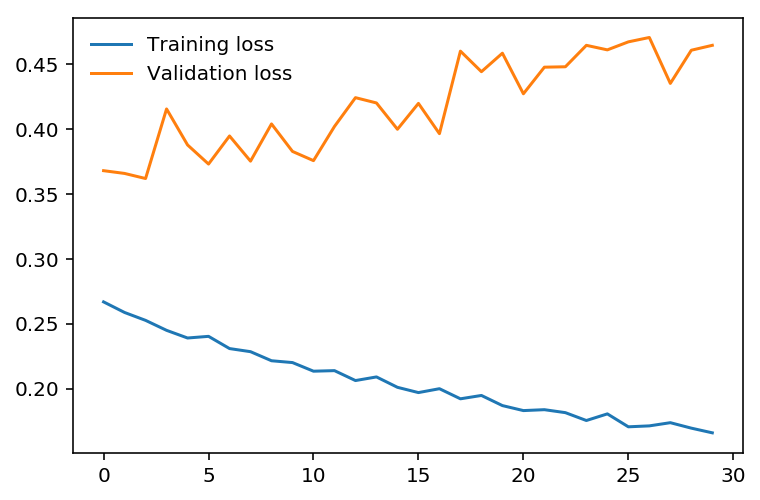

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [38]:
#to avoid overfitting we can use the dropout layer
#which will drop some gradient in calculation of gradients thus helping us overall
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Dropout(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Dropout(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [39]:
#we can use model.eval() which turn off the gradients and also set dropout probability to 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        images = images.view(images.shape[0],-1)
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0],-1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        #reseting the effect of eval mode
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.787..  Test Loss: 0.527..  Test Accuracy: 0.800
Epoch: 2/30..  Training Loss: 0.641..  Test Loss: 0.505..  Test Accuracy: 0.807
Epoch: 3/30..  Training Loss: 0.610..  Test Loss: 0.468..  Test Accuracy: 0.830
Epoch: 4/30..  Training Loss: 0.592..  Test Loss: 0.449..  Test Accuracy: 0.837
Epoch: 5/30..  Training Loss: 0.579..  Test Loss: 0.456..  Test Accuracy: 0.833
Epoch: 6/30..  Training Loss: 0.573..  Test Loss: 0.461..  Test Accuracy: 0.834
Epoch: 7/30..  Training Loss: 0.562..  Test Loss: 0.442..  Test Accuracy: 0.834
Epoch: 8/30..  Training Loss: 0.554..  Test Loss: 0.437..  Test Accuracy: 0.839
Epoch: 9/30..  Training Loss: 0.552..  Test Loss: 0.445..  Test Accuracy: 0.835
Epoch: 10/30..  Training Loss: 0.544..  Test Loss: 0.429..  Test Accuracy: 0.843
Epoch: 11/30..  Training Loss: 0.547..  Test Loss: 0.424..  Test Accuracy: 0.844
Epoch: 12/30..  Training Loss: 0.534..  Test Loss: 0.429..  Test Accuracy: 0.845
Epoch: 13/30..  Training Loss: 0.539.

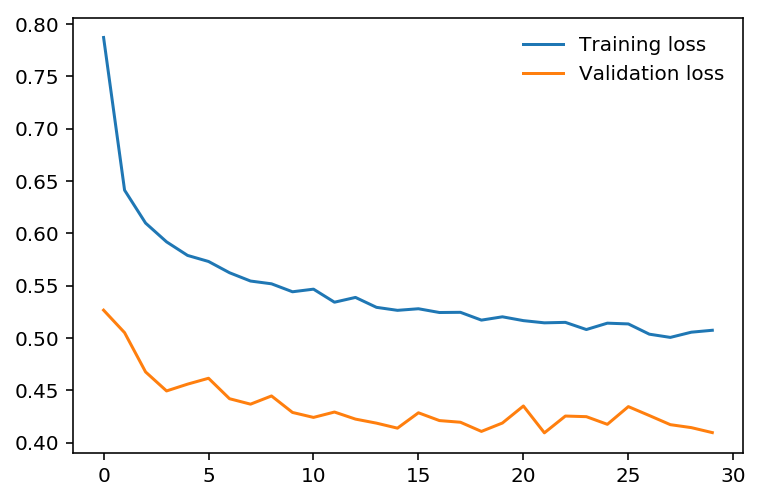

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

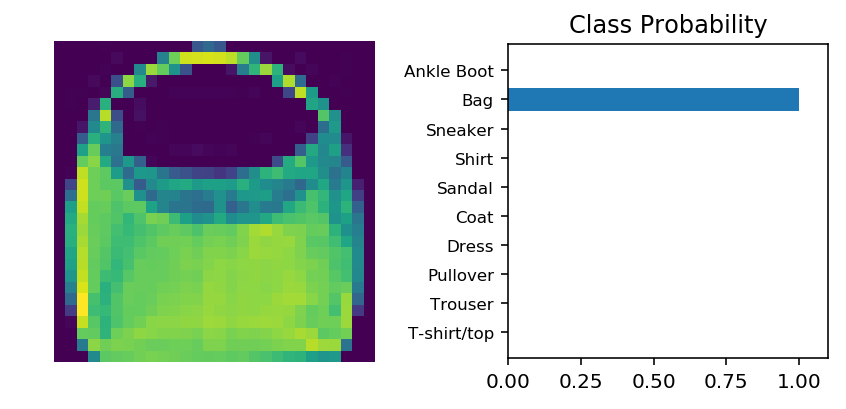

In [41]:
#now the model can be used for infrence mode 
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')